In [6]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Regresion lineal - Descomposicion LU (Cholesky)

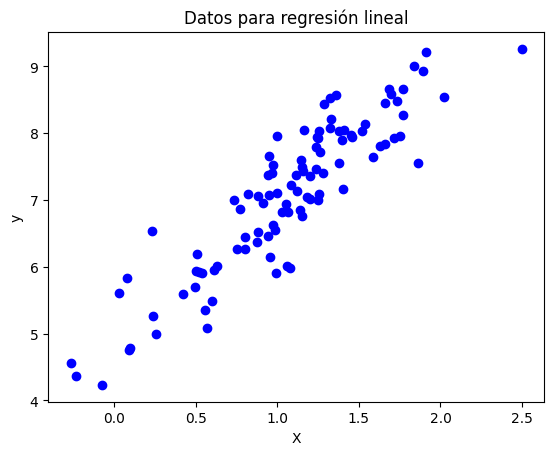

In [7]:
#Generacion de datos para la regresion lineal
# Parámetros para la recta
M = 2.0  # Pendiente
b = 5.0  # Intercepto

# Generar 200 valores para X con una distribución normal
x_vals = np.random.normal(1.0, 0.5, 100)

# Generar los valores de y utilizando la ecuación de la recta y = Ax + b y añadiendo algo de ruido
noise = np.random.normal(0.0, 0.5, 100)  # Ruido con dispersión
y_vals = M * x_vals + b + noise


# Visualización de los datos generados
plt.scatter(x_vals, y_vals, color='blue')
plt.title("Datos para regresión lineal")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [8]:
#construccion de las matices y los tensores

#pasa x_vals a una matriz columna
A = (np.matrix(x_vals))
b = (np.matrix(y_vals))

A_tensor = tf.constant(A)
b_tensor = tf.constant(b)

#construccion de las matices y los tensores

#pasa x_vals a una matriz columna
x_vals_column = np.transpose(np.matrix(x_vals))
#crea una matriz de columnas rellena con el valor 1
ones_column = np.transpose(np.matrix(np.repeat(1,100)))
A = np.column_stack((x_vals_column, ones_column))
b = np.transpose(np.matrix(y_vals))

A_tensor = tf.constant(A)
b_tensor = tf.constant(b)

In [9]:
tA_A = tf.matmul(np.transpose(A),A)
L = tf.linalg.cholesky(tA_A)
tA_b = tf.matmul(np.transpose(A),b)
Y_sol = tf.linalg.solve(L, tA_b)
X_sol = tf.linalg.solve(tf.transpose(L), Y_sol)

X_sol
#Resultado del calculo
print(f'M = {X_sol[0].numpy()[0]:.3f}, b = {X_sol[1].numpy()[0]:.3f} ')

M = 1.992, b = 4.954 


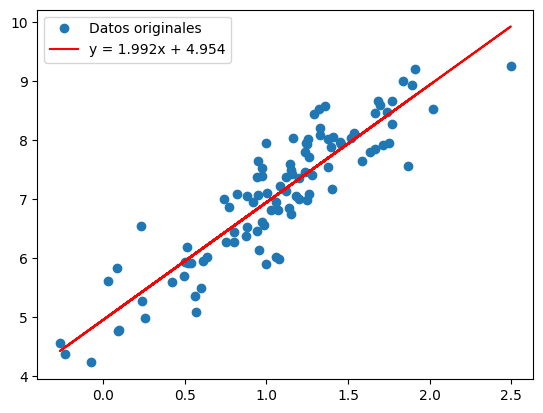

In [10]:
best_fit = []
for i in x_vals:
    best_fit.append(X_sol[0].numpy()[0]*i+X_sol[1].numpy()[0])

plt.plot(x_vals, y_vals, 'o', label = "Datos originales")
plt.plot(x_vals, best_fit, 'r-', label=f'y = {X_sol[0].numpy()[0]:.3f}x + {X_sol[1].numpy()[0]:.3f}')
plt.legend(loc = "upper left")
plt.show()